This Notebook is based first on adapting the code on the following web page to explore our DC crime data:  

http://pbpython.com/simple-graphing-pandas.html


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
pd.__version__

'0.22.0'

In [3]:
%matplotlib inline

In [5]:
crimes=pd.read_csv("dc_crime2018423.csv",parse_dates=['START_DATE'])
crimes.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 32,7708.0,property,-76.955521,2016-10-04T16:37:29.000,motor vehicle theft,evening,135396.0,6.0,7,...,403859.0,3500 - 3526 block of minnesota avenue se,2016-10-04 16:09:08,16168699,motor vehicle theft,7B,2016-10-05T03:00:47.000Z,others,"38.886402972929169,-76.955523453842957",38.886395
1,cluster 4,100.0,property,-77.059614,2016-10-04T17:44:13.000,theft/other,evening,137194.0,2.0,2,...,394829.0,3000 - 3029 block of k street nw,2016-10-04 17:00:48,16168738,theft/other,2E,2016-10-05T01:36:11.000Z,others,"38.902593275715809,-77.059616752356732",38.902585
2,cluster 23,8904.0,property,-76.981924,2016-10-04T20:10:43.000,theft/other,evening,136987.0,5.0,5,...,401568.0,1500 - 1599 block of maryland avenue ne,2016-10-04 19:21:09,16168845,theft/other,5D,2016-10-05T02:21:19.000Z,others,"38.900742359981244,-76.981925885322667",38.900735
3,cluster 29,9601.0,violent,-76.937531,2016-10-14T00:12:56.000,robbery,midnight,138092.0,6.0,7,...,405418.0,1500 1535 block of 45th street ne,2016-10-13 22:45:39,16174401,robbery,7D,2016-10-14T05:31:03.000Z,gun,"38.910681288493713,-76.937533164068512",38.910673
4,cluster 25,10600.0,violent,-76.995538,2016-10-22T16:40:05.000,robbery,evening,137463.0,5.0,6,...,400387.0,700 - 799 block of florida avenue ne,2016-10-22 16:24:12,16180021,robbery,6C,2016-10-22T22:55:30.000Z,gun,"38.90503165003841,-76.995540557600265",38.905024


In [6]:
crimes.describe()

,CENSUS_TRACT,LONGITUDE,YBLOCK,DISTRICT,WARD,YEAR,PSA,ucr-rank,XBLOCK,CCN,LATITUDE
count,68891.000000,69047.000000,69047.000000,69024.000000,69047.000000,69047.000000,69018.000000,69047.000000,69047.000000,6.904700e+04,69047.000000
mean,6239.901439,-77.007812,137643.004474,3.666435,4.413153,2016.734992,371.193862,6.052892,399322.959791,1.685932e+07,38.906640
std,3109.058330,0.035928,3357.622141,1.952688,2.342396,0.671448,195.087980,1.300240,3116.131280,7.476037e+05,0.030245
min,100.000000,-77.113642,127300.000000,1.000000,1.000000,2016.000000,101.000000,1.000000,390147.000000,2.111617e+06,38.813471
25%,3600.000000,-77.031223,136128.000000,2.000000,2.000000,2016.000000,206.000000,6.000000,397293.000000,1.616979e+07,38.892979
50%,6900.000000,-77.012913,137611.000000,3.000000,5.000000,2017.000000,308.000000,6.000000,398880.000000,1.705153e+07,38.906338
75%,8904.000000,-76.985512,139596.000000,5.000000,6.000000,2017.000000,506.000000,7.000000,401257.000000,1.717364e+07,38.924239
max,11100.000000,-76.910021,147292.000000,7.000000,8.000000,2018.000000,708.000000,9.000000,407806.000000,8.501717e+07,38.993560


In [7]:
crimes['ucr-rank'].describe()

count    69047.000000
mean         6.052892
std          1.300240
min          1.000000
25%          6.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: ucr-rank, dtype: float64

In [8]:
crimes.dtypes

NEIGHBORHOOD_CLUSTER            object
CENSUS_TRACT                   float64
offensegroup                    object
LONGITUDE                      float64
END_DATE                        object
offense-text                    object
SHIFT                           object
YBLOCK                         float64
DISTRICT                       float64
WARD                             int64
YEAR                             int64
offensekey                      object
BID                             object
sector                          object
PSA                            float64
ucr-rank                         int64
BLOCK_GROUP                     object
VOTING_PRECINCT                 object
XBLOCK                         float64
BLOCK                           object
START_DATE              datetime64[ns]
CCN                              int64
OFFENSE                         object
ANC                             object
REPORT_DAT                      object
METHOD                   

In [9]:
crimetypes = crimes[['WARD','offensegroup','offense-text','offensekey','ucr-rank','OFFENSE','METHOD','START_DATE']]
crimetypes.head()

,WARD,offensegroup,offense-text,offensekey,ucr-rank,OFFENSE,METHOD,START_DATE
0,7,property,motor vehicle theft,property|motor vehicle theft,8,motor vehicle theft,others,2016-10-04 16:09:08
1,2,property,theft/other,property|theft/other,6,theft/other,others,2016-10-04 17:00:48
2,5,property,theft/other,property|theft/other,6,theft/other,others,2016-10-04 19:21:09
3,7,violent,robbery,violent|robbery,4,robbery,gun,2016-10-13 22:45:39
4,6,violent,robbery,violent|robbery,4,robbery,gun,2016-10-22 16:24:12


In [10]:
offense_group = crimetypes.groupby('OFFENSE')
offense_group.size()

OFFENSE
arson                             9
assault w/dangerous weapon     3943
burglary                       3471
homicide                        256
motor vehicle theft            5083
robbery                        4789
sex abuse                       619
theft f/auto                  22093
theft/other                   28784
dtype: int64

In [11]:
ucr_avg = offense_group.mean()
ucr_avg.sort_values(by='ucr-rank').head()

,WARD,ucr-rank
OFFENSE,,
homicide,6.359375,1.0
sex abuse,5.037157,2.0
assault w/dangerous weapon,5.654324,3.0
robbery,5.045939,4.0
burglary,4.965140,5.0


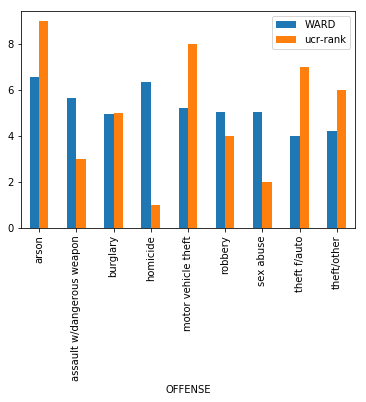

In [12]:
my_plot = ucr_avg.plot(kind='bar')

Text(0,0.5,'UCR Rank (1-9)')

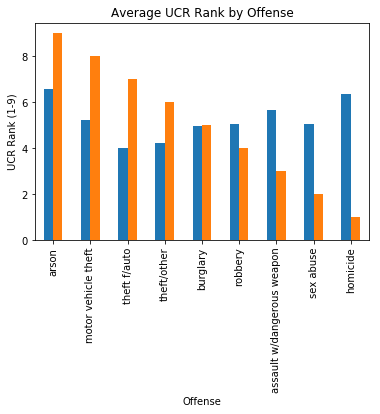

In [27]:
my_plot = ucr_avg.sort_values(by='ucr-rank',ascending=False).plot(kind='bar',legend=None,title="Average UCR Rank by Offense")
my_plot.set_xlabel("Offense")
my_plot.set_ylabel("UCR Rank (1-9)")

In [13]:
crimetypes = crimes[['offensegroup','WARD','ucr-rank','START_DATE']]
crimetypes.head()

,offensegroup,WARD,ucr-rank,START_DATE
0,property,7,8,2016-10-04 16:09:08
1,property,2,6,2016-10-04 17:00:48
2,property,5,6,2016-10-04 19:21:09
3,violent,7,4,2016-10-13 22:45:39
4,violent,6,4,2016-10-22 16:24:12


In [14]:
ward_group=crimetypes.groupby(['offensegroup','WARD']).mean()

In [63]:
ward_group.head(20)

ucr-rank
offensegroup WARD          
property     1     6.551977
             2     6.377454
             3     6.426696
             4     6.591125
             5     6.517702
             6     6.455884
             7     6.572192
             8     6.437781
violent      1     3.538608
             2     3.398438
             3     3.456790
             4     3.475032
             5     3.360337
             6     3.482959
             7     3.352701
             8     3.229736

In [15]:
ward_group.unstack().head()

ucr-rank                                                    \
WARD                 1         2         3         4         5         6   
offensegroup                                                               
property      6.551977  6.377454  6.426696  6.591125  6.517702  6.455884   
violent       3.538608  3.398438  3.456790  3.475032  3.360337  3.482959   

                                  
WARD                 7         8  
offensegroup                      
property      6.572192  6.437781  
violent       3.352701  3.229736

Text(0,0.5,'Average UCR Rank')

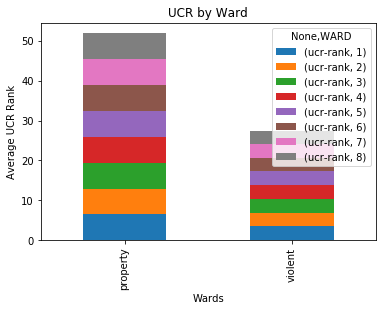

In [16]:
my_plot = ward_group.unstack().plot(kind='bar',stacked=True,title="UCR by Ward")
my_plot.set_xlabel("Wards")
my_plot.set_ylabel("Average UCR Rank")

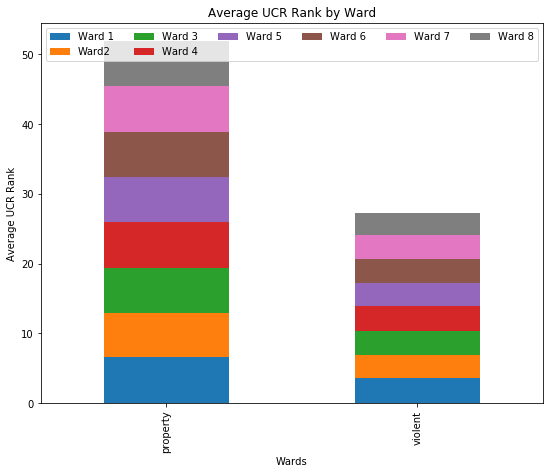

In [21]:
my_plot = ward_group.unstack().plot(kind='bar',stacked=True,title="Average UCR Rank by Ward",figsize=(9, 7))
my_plot.set_xlabel("Wards")
my_plot.set_ylabel("Average UCR Rank")
my_plot.legend(["Ward 1","Ward2","Ward 3","Ward 4","Ward 5","Ward 6","Ward 7","Ward 8"], loc=9,ncol=6)


In [33]:
crime_patterns = crimes[['ucr-rank','START_DATE']]
crime_patterns.head()

,ucr-rank,START_DATE
0,8,2016-10-04 16:09:08
1,6,2016-10-04 17:00:48
2,6,2016-10-04 19:21:09
3,4,2016-10-13 22:45:39
4,4,2016-10-22 16:24:12


Text(0,0.5,'Number of Crimes')

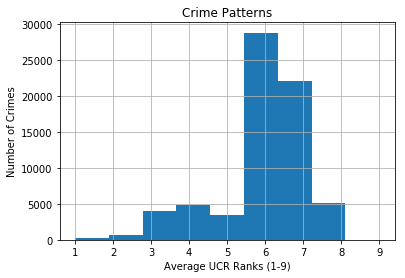

In [34]:
crime_plot = crime_patterns['ucr-rank'].hist(bins=9)
crime_plot.set_title("Crime Patterns")
crime_plot.set_xlabel("Average UCR Ranks (1-9)")
crime_plot.set_ylabel("Number of Crimes")

In [35]:
crime_patterns = crimes[['ucr-rank','START_DATE']]
crime_patterns.head(10)

,ucr-rank,START_DATE
0,8,2016-10-04 16:09:08
1,6,2016-10-04 17:00:48
2,6,2016-10-04 19:21:09
3,4,2016-10-13 22:45:39
4,4,2016-10-22 16:24:12
5,7,2016-10-22 20:21:52
6,6,2016-10-22 21:53:20
7,7,2016-10-23 01:30:55
8,7,2016-10-22 09:00:04
9,7,2016-11-01 08:30:07


In [81]:
crime_patterns.tail(20)

,ucr-rank,START_DATE
69027,7,2018-01-22 19:54:09
69028,8,2018-01-22 16:00:08
69029,7,2018-01-22 19:00:12
69030,4,2018-01-22 21:57:36
69031,4,2018-01-22 23:24:22
69032,3,2018-01-23 00:00:05
69033,7,2018-01-22 19:30:34
69034,6,2018-01-17 16:30:20
69035,7,2018-02-04 16:00:41
69036,6,2018-04-22 15:42:27


In [36]:
#Doesn't work for some reason
crime_patterns = crime_patterns.set_index('START_DATE')
crime_patterns.tail(12)

,ucr-rank
START_DATE,
2018-02-04 16:00:41,7
2018-04-22 15:42:27,6
2018-04-22 18:52:40,6
2018-04-22 18:59:44,6
2018-04-22 19:30:48,6
2018-04-22 20:52:44,6
2018-04-21 00:55:47,6
2018-04-19 10:29:27,6
2018-04-22 03:45:50,4


In [37]:
#Changing the sampling to year instead of month
crime_patterns.tail(200).resample('A',how=sum)

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


,ucr-rank
START_DATE,
2017-12-31,14
2018-12-31,1211


In [38]:
crime_patterns.resample('Y').mean() #not working for year end
crime_patterns.tail(12)

,ucr-rank
START_DATE,
2018-02-04 16:00:41,7
2018-04-22 15:42:27,6
2018-04-22 18:52:40,6
2018-04-22 18:59:44,6
2018-04-22 19:30:48,6
2018-04-22 20:52:44,6
2018-04-21 00:55:47,6
2018-04-19 10:29:27,6
2018-04-22 03:45:50,4


#try this - doesn't work
#https://stackoverflow.com/questions/41517127/python-pandas-resample-date-range?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
date_range = crime_patterns(start = '5/3/2005', periods =5+1, freq='1D')
new_date_range = crime_patterns.date_range(date_range.min(), date_range.max(), freq='30 min')

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


AttributeError: 'AxesSubplot' object has no attribute 'tail'

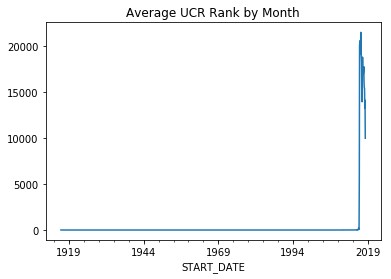

In [39]:
crime_plot = crime_patterns.resample('M',how=sum).plot(title="Average UCR Rank by Month",legend=None)
crime_plot.tail(10)

In [172]:
#This csv file comes from a postgres View that links the blockadvisor_location and blockadvisor_crime tables (crimes for each location)
loc_crimes=pd.read_csv("location_crime_20180424.csv",parse_dates=['report_date'])
loc_crimes.head()

,business_name,address,category01,rating,block,offense,offense_group,method,ucrrank,year,report_date
0,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,assault w/dangerous weapon,violent,gun,3,2018,2018-01-21 06:17:06
1,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,assault w/dangerous weapon,violent,others,3,2016,2016-08-11 15:29:31
2,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,assault w/dangerous weapon,violent,knife,3,2016,2016-06-21 05:20:36
3,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,burglary,property,others,5,2017,2017-06-06 17:01:14
4,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,burglary,property,others,5,2016,2016-08-10 08:30:50


In [91]:
loc_crimes.describe()

,rating,ucrrank,year
count,588.000000,588.000000,588.000000
mean,4.665816,6.119048,2016.693878
std,0.235600,0.742557,0.640616
min,4.500000,3.000000,2016.000000
25%,4.500000,6.000000,2016.000000
50%,4.500000,6.000000,2017.000000
75%,5.000000,6.000000,2017.000000
max,5.000000,8.000000,2018.000000


In [92]:
loc_crimes['ucrrank'].describe()

count    588.000000
mean       6.119048
std        0.742557
min        3.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: ucrrank, dtype: float64

In [93]:
loc_crimes.dtypes

business_name            object
address                  object
category01               object
rating                  float64
block                    object
offense                  object
offense_group            object
method                   object
ucrrank                   int64
year                      int64
report_date      datetime64[ns]
dtype: object

In [173]:
businesses = loc_crimes[['business_name','offense','category01','ucrrank','report_date']]
businesses.head(200)

,business_name,offense,category01,ucrrank,report_date
0,Barrel,assault w/dangerous weapon,American (New),3,2018-01-21 06:17:06
1,Barrel,assault w/dangerous weapon,American (New),3,2016-08-11 15:29:31
2,Barrel,assault w/dangerous weapon,American (New),3,2016-06-21 05:20:36
3,Barrel,burglary,American (New),5,2017-06-06 17:01:14
4,Barrel,burglary,American (New),5,2016-08-10 08:30:50
5,Barrel,burglary,American (New),5,2016-07-05 17:39:03
6,Barrel,burglary,American (New),5,2016-06-10 01:12:42
7,Barrel,motor vehicle theft,American (New),8,2018-01-10 06:48:18
8,Barrel,motor vehicle theft,American (New),8,2017-06-10 01:15:58
9,Barrel,robbery,American (New),4,2018-02-07 04:22:05


In [186]:
business_group = businesses.groupby('category01')
business_group.size()

category01
American (New)    251
British             2
Chicken Shop      195
Diners             78
Italian            14
Tacos              48
dtype: int64

In [187]:
business_group = businesses.groupby('business_name')
business_group.size()

business_name
Barrel                  176
Farmbird                195
Grady's                  15
Honeysuckle              17
Napoli Pasta Bar         14
Rose's Luxury            43
The Alibi                 2
Tiki Taco                48
Unconventional Diner     78
dtype: int64

In [188]:
ucrrank_mean = business_group.mean()
ucrrank_mean.sort_values(by='ucrrank').head(9)

,ucrrank
business_name,
Barrel,5.892045
Grady's,5.933333
Farmbird,6.061538
Rose's Luxury,6.069767
Honeysuckle,6.176471
Tiki Taco,6.208333
The Alibi,6.500000
Unconventional Diner,6.653846
Napoli Pasta Bar,6.714286


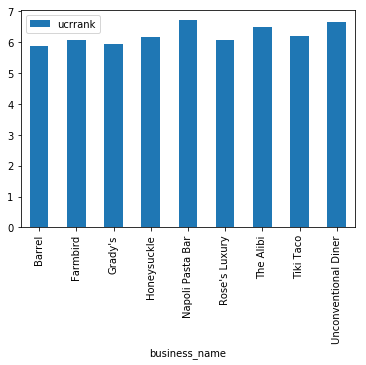

In [189]:
my_plot = ucrrank_mean.plot(kind='bar')

Text(0,0.5,'UCR Rank (1-9)')

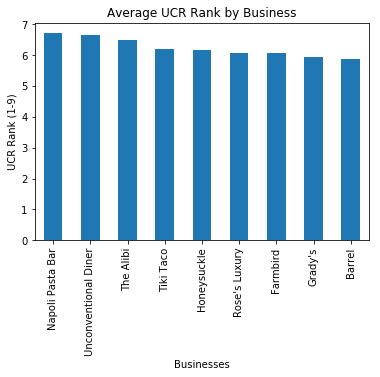

In [190]:
my_plot = ucrrank_mean.sort_values(by='ucrrank',ascending=False).plot(kind='bar',legend=None,title="Average UCR Rank by Business")
my_plot.set_xlabel("Businesses")
my_plot.set_ylabel("UCR Rank (1-9)")

In [146]:
businesses = loc_crimes[['business_name','ucrrank']]
businesses.head()

,business_name,ucrrank
0,Barrel,3
1,Barrel,3
2,Barrel,3
3,Barrel,5
4,Barrel,5


In [166]:
ucr_group=loc_crimes.groupby(['business_name','ucrrank']).mean()
ucr_group.head()

rating         year
business_name ucrrank                     
Barrel        3           4.5  2016.666667
              4           4.5  2016.875000
              5           4.5  2016.250000
              6           4.5  2016.718954
              7           4.5  2016.833333

In [167]:
ucr_group.unstack().head()

rating                                  year            \
ucrrank               3    4    5    6    7    8            3         4   
business_name                                                             
Barrel              4.5  4.5  4.5  4.5  4.5  4.5  2016.666667  2016.875   
Farmbird            NaN  5.0  5.0  5.0  5.0  5.0          NaN  2018.000   
Grady's             NaN  4.5  4.5  4.5  4.5  NaN          NaN  2016.500   
Honeysuckle         NaN  4.5  4.5  4.5  4.5  4.5          NaN  2016.000   
Napoli Pasta Bar    NaN  NaN  4.5  4.5  4.5  NaN          NaN       NaN   

                                                                  
ucrrank                 5            6            7            8  
business_name                                                     
Barrel            2016.25  2016.718954  2016.833333  2017.500000  
Farmbird          2018.00  2016.782123  2016.846154  2017.000000  
Grady's           2016.00  2016.625000  2017.000000          NaN  
Honeysuckle       2017.00  2017.000000  2016.666667  2016.333333  
Napoli Pasta Bar  2017.00  2017.000000  2016.818182          NaN

Text(0,0.5,'Average UCR Rank')

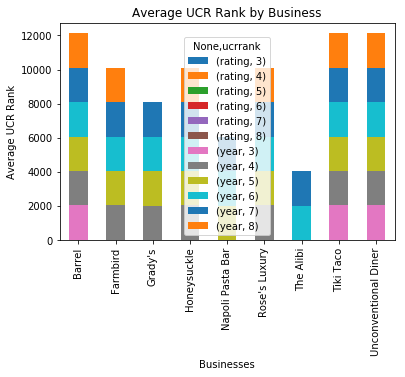

In [168]:
my_plot = ucr_group.unstack().plot(kind='bar',stacked=True,title="Average UCR Rank by Business")
my_plot.set_xlabel("Businesses")
my_plot.set_ylabel("Average UCR Rank")

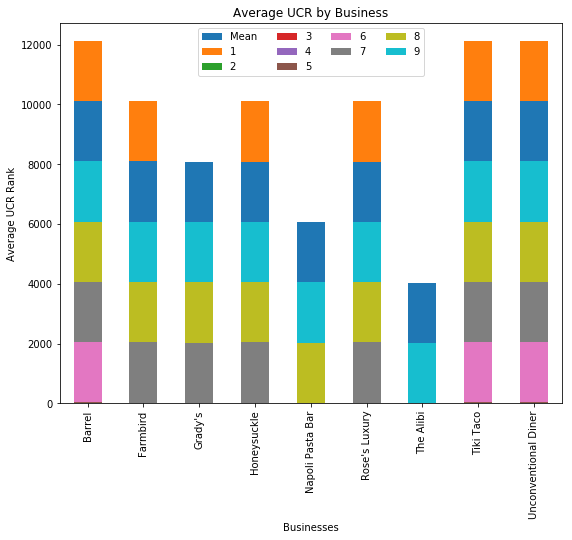

In [154]:
#Something wrong here
my_plot = ucr_group.unstack().plot(kind='bar',stacked=True,title="Average UCR by Business",figsize=(9, 7))
my_plot.set_xlabel("Businesses")
my_plot.set_ylabel("Average UCR Rank")
my_plot.legend(["Mean","1","2","3","4","5","6","7","8","9"], loc=9,ncol=4)

In [169]:
crime_patterns = loc_crimes[['ucrrank','report_date']]
crime_patterns.head(20)

,ucrrank,report_date
0,3,2018-01-21 06:17:06
1,3,2016-08-11 15:29:31
2,3,2016-06-21 05:20:36
3,5,2017-06-06 17:01:14
4,5,2016-08-10 08:30:50
5,5,2016-07-05 17:39:03
6,5,2016-06-10 01:12:42
7,8,2018-01-10 06:48:18
8,8,2017-06-10 01:15:58
9,4,2018-02-07 04:22:05


In [170]:
crime_patterns = crime_patterns.set_index('report_date')
crime_patterns.head(10)

,ucrrank
report_date,
2018-01-21 06:17:06,3
2016-08-11 15:29:31,3
2016-06-21 05:20:36,3
2017-06-06 17:01:14,5
2016-08-10 08:30:50,5
2016-07-05 17:39:03,5
2016-06-10 01:12:42,5
2018-01-10 06:48:18,8
2017-06-10 01:15:58,8


In [158]:
crime_patterns.resample('M',how=sum)

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


,ucrrank
report_date,
2016-04-30,112
2016-05-31,182
2016-06-30,174
2016-07-31,179
2016-08-31,166
2016-09-30,171
2016-10-31,142
2016-11-30,161
2016-12-31,181


C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


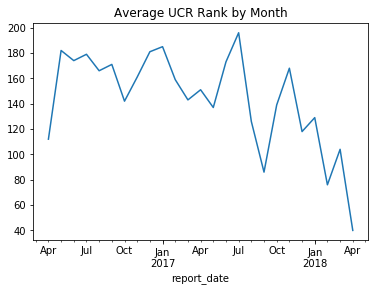

In [171]:
crime_plot = crime_patterns.resample('M',how=sum).plot(title="Average UCR Rank by Month",legend=None)